In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
twitter_data = pd.read_csv('../raw_data/twitter_data.csv', encoding='latin1')


In [3]:
twitter_data.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [4]:
len(twitter_data)

1599999

In [5]:
column_renaming = {
    "0": "Target",
    "1467810369": "Id",
    "Mon Apr 06 22:19:45 PDT 2009": "Time_Tweet",
    "NO_QUERY": "NO_QUERY",
    "_TheSpecialOne_": "User",
    """@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D""": "Tweet"
}

twitter_data.rename(columns=column_renaming, inplace=True)

In [6]:
#twitter_data = twitter_data[0:5000]
#len(twitter_data)

In [7]:
twitter_data.columns

Index(['Target', 'Id', 'Time_Tweet', 'NO_QUERY', 'User', 'Tweet'], dtype='object')

In [8]:
twitter_data.isnull().sum()

Target        0
Id            0
Time_Tweet    0
NO_QUERY      0
User          0
Tweet         0
dtype: int64

In [9]:
lenght_words = []
for index in twitter_data['Tweet']:
    lenght = len(index)
    lenght_words.append(lenght)
    
lenght_words   

[111,
 89,
 47,
 111,
 29,
 11,
 99,
 36,
 25,
 43,
 26,
 94,
 77,
 117,
 103,
 93,
 20,
 64,
 79,
 62,
 101,
 48,
 38,
 26,
 46,
 65,
 22,
 89,
 81,
 60,
 131,
 131,
 56,
 49,
 127,
 101,
 61,
 106,
 113,
 95,
 99,
 89,
 101,
 110,
 95,
 138,
 75,
 51,
 67,
 129,
 131,
 56,
 93,
 13,
 135,
 38,
 135,
 27,
 110,
 102,
 38,
 34,
 102,
 65,
 98,
 29,
 73,
 39,
 61,
 136,
 110,
 67,
 138,
 59,
 39,
 137,
 24,
 37,
 97,
 73,
 115,
 16,
 27,
 57,
 108,
 47,
 116,
 32,
 112,
 115,
 43,
 25,
 134,
 138,
 85,
 112,
 81,
 55,
 94,
 133,
 125,
 30,
 27,
 65,
 118,
 133,
 112,
 28,
 110,
 30,
 59,
 76,
 119,
 27,
 136,
 52,
 29,
 47,
 129,
 58,
 44,
 104,
 77,
 122,
 64,
 137,
 126,
 12,
 77,
 118,
 38,
 132,
 15,
 137,
 14,
 20,
 127,
 87,
 43,
 23,
 41,
 47,
 132,
 48,
 133,
 22,
 89,
 49,
 137,
 29,
 37,
 49,
 42,
 126,
 17,
 63,
 34,
 44,
 131,
 136,
 30,
 24,
 92,
 72,
 103,
 30,
 72,
 28,
 92,
 49,
 20,
 99,
 79,
 43,
 80,
 61,
 102,
 70,
 81,
 127,
 55,
 21,
 119,
 120,
 48,
 81,
 53,
 128

In [10]:
def get_length(X):
    for index in range(len(twitter_data['Tweet'])):
        lenght = len(index)
    return lenght

In [11]:
twitter_data['Length'] = twitter_data['Tweet'].str.len()

In [12]:
twitter_data

,Target,Id,Time_Tweet,NO_QUERY,User,Tweet,Length
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,111
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,89
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,47
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",111
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew,29
...,...,...,...,...,...,...,...
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...,56
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...,78
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...,57
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...,65


In [13]:
max(lenght_words)

374

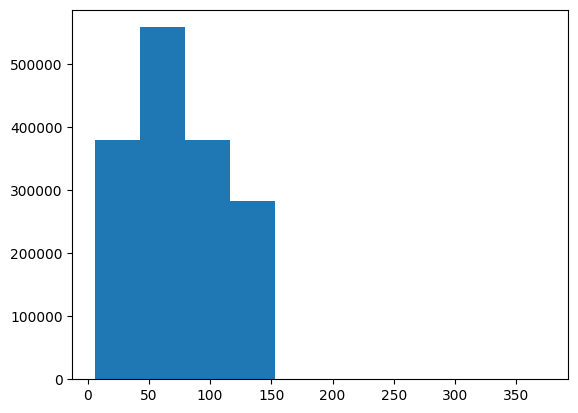

In [14]:
plt.hist(lenght_words);

In [15]:
twitter_data[twitter_data['Length'] < 70].count()

Target        804036
Id            804036
Time_Tweet    804036
NO_QUERY      804036
User          804036
Tweet         804036
Length        804036
dtype: int64

In [16]:
twitter_data['Tweet'][1766]

'tks pa 4 &quot;tapauing&quot; croissant tuna knowing dat Ive back-to-back meetings since morning  &amp; Zuraidah tks 4 buying my FAV STARBUCK MOCHA FRAP'

# DATA CLEANING

In [17]:
twitter_data['Target'].unique()

array([0, 4])

In [18]:
twitter_data[['Target']].value_counts(normalize=True)

Target
4         0.5
0         0.5
Name: proportion, dtype: float64

In [19]:
from nltk.corpus import stopwords


stop_words = set(stopwords.words('english'))

stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [20]:
import re
import string
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from textblob import TextBlob


def preprocessing(sentence):
    
    #correct grammar
    #blob = TextBlob(sentence)
    #sentence = str(blob.correct())
        
    #remove white spaces
    sentence = sentence.strip()
    
    #lower the characters
    sentence = sentence.lower()
    
    #remove unique characters
    sentence = sentence.replace('½', 'half')
    
    #remove numbers
    sentence = re.sub(r'\b\d+\b', '', sentence)
    
    #remove emails
    email_pattern = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b'
    sentence = re.sub(email_pattern, '', sentence)
    
    #remove twitter handles
    handle_pattern = r'@\w+'
    sentence = re.sub(handle_pattern, '', sentence)
    
    #remove twitter emoticons
    emoticon_pattern = r'[:;=8][\-o\*\']?[\)\]\(\[dDpP/:}{@|\\]'
    sentence = re.sub(emoticon_pattern, '', sentence)
    
    #remove websites
    url_pattern = r'https?://\S+|www\.\S+'
    sentence = re.sub(url_pattern, '', sentence)
    
    #tokenize sentence 
    tokens = word_tokenize(sentence)
    
    #remove stop words
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    
    # Remove punctuation
    filtered_tokens = [''.join([c for c in word if c not in string.punctuation]) for word in filtered_tokens if word not in string.punctuation]
    
    #repeated characters
    pattern = re.compile(r"(.)\1{2,}")
    filtered_tokens = [pattern.sub(r"\1", word) for word in filtered_tokens]
    
    #lemmatize the tokens
    wnl = WordNetLemmatizer()
    #iterate with lemmatizer for verbs
    verb_lemmatize_words = [wnl.lemmatize(word, pos = "v") for word in filtered_tokens]
    #iterate with lemmatizer for nouns
    noun_lemmatize_words = [wnl.lemmatize(word, pos = "n") for word in verb_lemmatize_words]
    
    #join tokens
    sentence = ' '.join(noun_lemmatize_words)
    return sentence

In [21]:
from textblob import TextBlob

blob = TextBlob('uncorrect')

corrected_word = str(blob.correct())

print(corrected_word) 

incorrect


In [22]:
#cleaned_text = preprocessing('i am feeling super exceited for the project that we are working on natural language processing')
#cleaned_text

# NEW DATASET

In [23]:
cleaned_twitter_data = pd.read_csv('../raw_data/cleaned_twitter_data.csv', encoding='latin1')
cleaned_twitter_data.head()

,Target,Id,Time_Tweet,NO_QUERY,User,Tweet,clean_text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset ca nt update facebook texting might cry...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,dive many time ball manage save rest go bound
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole body feel itchy like fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",s behave m mad ca nt see
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew,whole crew


In [24]:
cleaned_twitter_data[cleaned_twitter_data['clean_text'].isnull()]

,Target,Id,Time_Tweet,NO_QUERY,User,Tweet,clean_text
207,0,1467863072,Mon Apr 06 22:33:25 PDT 2009,NO_QUERY,Artiel87,@mandayyy,NaN
248,0,1467874569,Mon Apr 06 22:36:27 PDT 2009,NO_QUERY,Artiel87,@mandayyy,NaN
397,0,1467912842,Mon Apr 06 22:46:53 PDT 2009,NO_QUERY,KimberlyKane,@danadearmond,NaN
429,0,1467919452,Mon Apr 06 22:48:48 PDT 2009,NO_QUERY,jtmal0723,@anistorm,NaN
554,0,1467950866,Mon Apr 06 22:57:47 PDT 2009,NO_QUERY,melbrehl,@phlaimeaux where are you?,NaN
...,...,...,...,...,...,...,...
1598920,4,2193305981,Tue Jun 16 08:16:39 PDT 2009,NO_QUERY,Jsstar0273,If only?,NaN
1599493,4,2193453573,Tue Jun 16 08:28:48 PDT 2009,NO_QUERY,RobNice24,@Sworn4DaBosses,NaN
1599551,4,2193475408,Tue Jun 16 08:30:32 PDT 2009,NO_QUERY,SamNiley11,@francii_ me too,NaN
1599810,4,2193550913,Tue Jun 16 08:36:39 PDT 2009,NO_QUERY,handriani,to be with you,NaN


In [25]:
preprocessing(cleaned_twitter_data['Tweet'].iloc[1598920])

''

In [26]:
#Cleaning function is considerably slow for large amounts of data

In [27]:
cleaned_twitter_data.dropna(subset=['clean_text'], inplace=True)

In [28]:
cleaned_twitter_data['tweet_len'] = cleaned_twitter_data['Tweet'].str.len()

In [29]:
cleaned_twitter_data['clean_len'] = cleaned_twitter_data['clean_text'].str.len()

In [30]:
cleaned_twitter_data.drop(columns=['Target', 'Time_Tweet', 'NO_QUERY', 'User'], inplace=True)

In [31]:
cleaned_twitter_data

,Id,Tweet,clean_text,tweet_len,clean_len
0,1467810672,is upset that he can't update his Facebook by ...,upset ca nt update facebook texting might cry...,111,76
1,1467810917,@Kenichan I dived many times for the ball. Man...,dive many time ball manage save rest go bound,89,45
2,1467811184,my whole body feels itchy and like its on fire,whole body feel itchy like fire,47,31
3,1467811193,"@nationwideclass no, it's not behaving at all....",s behave m mad ca nt see,111,24
4,1467811372,@Kwesidei not the whole crew,whole crew,29,10
...,...,...,...,...,...
1599994,2193601966,Just woke up. Having no school is the best fee...,wake school best feel ever,56,26
1599995,2193601969,TheWDB.com - Very cool to hear old Walt interv...,thewdbcom cool hear old walt interview Ã¢Â Â«...,81,62
1599996,2193601991,Are you ready for your MoJo Makeover? Ask me f...,ready mojo makeover ask detail,57,30
1599997,2193602064,Happy 38th Birthday to my boo of alll time!!! ...,happy 38th birthday boo al time tupac amaru sh...,65,50


In [32]:
cleaned_twitter_data = cleaned_twitter_data[cleaned_twitter_data['tweet_len'] > 70]

In [47]:
cleaned_twitter_data

,Id,Tweet,clean_text,tweet_len,clean_len
0,1467810672,is upset that he can't update his Facebook by ...,upset ca nt update facebook texting might cry...,111,76
1,1467810917,@Kenichan I dived many times for the ball. Man...,dive many time ball manage save rest go bound,89,45
3,1467811193,"@nationwideclass no, it's not behaving at all....",s behave m mad ca nt see,111,24
6,1467811594,@LOLTrish hey long time no see! Yes.. Rains a...,hey long time see yes rain bite bite lol m fi...,99,56
11,1467812723,@caregiving I couldn't bear to watch it. And ...,could nt bear watch think ua loss embarrass,94,43
...,...,...,...,...,...
1599986,2193579092,@La_r_a NEVEER I think that you both will get...,neveer think get well,73,22
1599987,2193579191,@Roy_Everitt ha- good job. that's right - we g...,ha good job s right get ta throw bigrun tag ev...,125,77
1599990,2193579284,@rmedina @LaTati Mmmm That sounds absolutely ...,m sound absolutely perfect schedule full wo n...,133,71
1599993,2193579489,"@Cliff_Forster Yeah, that does work better tha...",yeah work better wait end wonder time keep goo...,132,52


In [34]:
cleaned_twitter_data = cleaned_twitter_data[cleaned_twitter_data['tweet_len'] <= 140]

In [50]:
cleaned_twitter_data[cleaned_twitter_data['tweet_len'] > 140].count()

Id            0
Tweet         0
clean_text    0
tweet_len     0
clean_len     0
dtype: int64

In [53]:
cleaned_twitter_data

,Id,Tweet,clean_text,tweet_len,clean_len
0,1467810672,is upset that he can't update his Facebook by ...,upset ca nt update facebook texting might cry...,111,76
1,1467810917,@Kenichan I dived many times for the ball. Man...,dive many time ball manage save rest go bound,89,45
3,1467811193,"@nationwideclass no, it's not behaving at all....",s behave m mad ca nt see,111,24
6,1467811594,@LOLTrish hey long time no see! Yes.. Rains a...,hey long time see yes rain bite bite lol m fi...,99,56
11,1467812723,@caregiving I couldn't bear to watch it. And ...,could nt bear watch think ua loss embarrass,94,43
...,...,...,...,...,...
1599986,2193579092,@La_r_a NEVEER I think that you both will get...,neveer think get well,73,22
1599987,2193579191,@Roy_Everitt ha- good job. that's right - we g...,ha good job s right get ta throw bigrun tag ev...,125,77
1599990,2193579284,@rmedina @LaTati Mmmm That sounds absolutely ...,m sound absolutely perfect schedule full wo n...,133,71
1599993,2193579489,"@Cliff_Forster Yeah, that does work better tha...",yeah work better wait end wonder time keep goo...,132,52


# LDA 2ND ITERATION

In [54]:
cleaned_twitter_data.isnull().sum()

Id            0
Tweet         0
clean_text    0
tweet_len     0
clean_len     0
dtype: int64

## Vectorizer

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [38]:
"""with TfidfVectorizer the vectorization is weighted as opposed to counted, 
giving better visuals on how each topic weights in terms of full corpus

Term Frequency: Measures the frequency of a word in a document. 
It increases with the number of occurrences of that word within the document.

Inverse Document Frequency: Measures how important a word is across all documents in the corpus. 
It decreases the weight of words that occur frequently across all documents and increases the weight of terms that 
occur rarely."""

'with TfidfVectorizer the vectorization is weighted as opposed to counted, \ngiving better visuals on how each topic weights in terms of full corpus\n\nTerm Frequency: Measures the frequency of a word in a document. \nIt increases with the number of occurrences of that word within the document.\n\nInverse Document Frequency: Measures how important a word is across all documents in the corpus. \nIt decreases the weight of words that occur frequently across all documents and increases the weight of terms that \noccur rarely.'

In [57]:
vectorizer = TfidfVectorizer(ngram_range = (1, 2), min_df=5, max_df=50, max_features=5000)

In [58]:
vectorized_clean_text = vectorizer.fit_transform(cleaned_twitter_data['clean_text'])

In [59]:
vectorized_clean_text = pd.DataFrame(
    vectorized_clean_text.toarray(),
    columns = vectorizer.get_feature_names_out())

## LDA MODEL

In [61]:
n_components = 10

In [62]:
from sklearn.decomposition import LatentDirichletAllocation


lda_model = LatentDirichletAllocation(n_components=n_components, max_iter = 100)

In [ ]:
lda_model.fit(vectorized_clean_text)

# USER INPUT FUNCTION

In [45]:
"""from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

def pre_process_user_input():
    sentence = input("How is your day going so far? Please insert minimum 70 characters and max 140")
    if len(sentence) < 70:
        print('We would love to know more about how your day is going! Could you provide us with a couple more details?')
        return sentence
    elif len(sentence) > 140:
        print('Thank you for sharing with us how your day is going! Could you please rephrase your sentence with a max of 140 characters?')
        return sentence
    else:
        preprocessed = preprocessing(sentence)
        vectorizer = TfidfVectorizer()
        vectorized_clean_text = vectorizer.fit_transform(preprocessed)
        
        #instantiate LDA model
        n_components = 1
        lda_model = LatentDirichletAllocation(n_components=n_components, max_iter = 100)
        lda_model.fit(vectorized_clean_text)
        #feature topics
        feature_names = vectorizer.get_feature_names_out()
        for idx, topic in enumerate(lda_model.components_):
            top_words_indices = topic.argsort()[:-5 - 1:-1]
            top_words = [(feature_names[i], topic[i]) for i in top_words_indices]
            for word in top_words:
                print(preprocessed)
                print(word)
        """

'from sklearn.feature_extraction.text import TfidfVectorizer\nfrom sklearn.decomposition import LatentDirichletAllocation\n\ndef pre_process_user_input():\n    sentence = input("How is your day going so far? Please insert minimum 70 characters and max 140")\n    if len(sentence) < 70:\n        print(\'We would love to know more about how your day is going! Could you provide us with a couple more details?\')\n        return sentence\n    elif len(sentence) > 140:\n        print(\'Thank you for sharing with us how your day is going! Could you please rephrase your sentence with a max of 140 characters?\')\n        return sentence\n    else:\n        preprocessed = preprocessing(sentence)\n        vectorizer = TfidfVectorizer()\n        vectorized_clean_text = vectorizer.fit_transform(preprocessed)\n        \n        #instantiate LDA model\n        n_components = 1\n        lda_model = LatentDirichletAllocation(n_components=n_components, max_iter = 100)\n        lda_model.fit(vectorized_cl

In [46]:
"""pre_process_user_input()"""

'pre_process_user_input()'